In [2]:
import requests
import json
import requests
import numpy
import matplotlib.pyplot as plt
file=open('twits.txt','r')
S=file.read()
#S=req.text
S=S.split("\n")
T=[json.loads(S[i]) for i in range(len(S)-1)]
L=[T[k]['messages'] for k in range(len(T))]
M=[x for y in L for x in y ]
IDnumbers=set([x['id'] for x in M])
IDcount={}
for id in IDnumbers:
    S=[x for x in M if x['id']==id]
    IDcount[str(id)]=len(S)
IDloc={}
for k in range(len(M)):
    id=str(M[k]['id'])
    if id in IDloc.keys():
        IDloc[id].append(k)
    else:
        IDloc[id]=[k]
P=[M[IDloc[id][0]] for id in IDloc]
train_number=int(len(P)*3/4)
test_number=len(P)-train_number
x_number=4;
followers_number_train=[]
followers_number_test=[]
train_X=numpy.zeros((train_number,x_number))
train_Y=[]
test_X=numpy.zeros((test_number,x_number))
test_Y=[]
X_keys=['following', 'like_count',  'watchlist_stocks_count', 'ideas']
for i in range(train_number):
    followers_number_train.append(P[i]['user']['followers'])
    for j in range(x_number):
        train_X[i][j]=P[i]['user'][X_keys[j]]
for i in range(train_number,len(P)):
    followers_number_test.append(P[i]['user']['followers'])
    for j in range(x_number):
        test_X[i-train_number][j]=P[i]['user'][X_keys[j]]
train_median=numpy.median(followers_number_train)
test_median=numpy.median(followers_number_test)
for item in followers_number_train:
    if item>= train_median:
        train_Y.append(1)
    else:
        train_Y.append(0)
for item in followers_number_test:
    if item>=test_median:
        test_Y.append(1)
    else:
        test_Y.append(0)

In [4]:
def confusion_matrix(Ytrue,Ypred,threshold):
    M=numpy.zeros((2,2))
    n=len(Ytrue)
    M[0,0]=len([k for k in range(n) if Ytrue[k]==0 and Ypred[k][1]<threshold])
    M[0,1]=len([k for k in range(n) if Ytrue[k]==0 and Ypred[k][1]>=threshold])
    M[1,0]=len([k for k in range(n) if Ytrue[k]==1 and Ypred[k][1]<=threshold])
    M[1,1]=len([k for k in range(n) if Ytrue[k]==1 and Ypred[k][1]>threshold])
    return(M)
def Get_ration(Matrix):
    ration1=Matrix[0][0]/(Matrix[0][0]+Matrix[0][1])
    ration2=Matrix[1][1]/(Matrix[1][0]+Matrix[1][1])
    Ration=[ration1,ration2]
    return Ration
def Write_File(Method,File,Matrix):
    File.write('\n----------------------\n'+Method+'\n')
    File.write("Confusion Matrix:\n"+str(Matrix[0][0])+"   "+str(Matrix[0][1])+'\n'+str(Matrix[1][0])+"   "+str(Matrix[1][1]))
    File.write("\n")
    File.write("Correct Ratio:   "+'%.2f%%' % (Get_ration(Matrix)[0]*100)+"    "+'%.2f%%' % (Get_ration(Matrix)[1]*100))
def Plot(test_Y,Ypred,Name):
    x = [float(i/100) for i in range(0,101)]
    Matrix_array=[confusion_matrix(test_Y,Ypred,i) for i in x]
    y1= [(1-Get_ration(i)[0]) for i in Matrix_array]
    y2 = [Get_ration(i)[1] for i in Matrix_array]
    plt.figure()
    plt.plot(y1,y2,x,x)
    plt.xlabel("True rate") 
    plt.ylabel("False rate")  
    plt.title(Name) 
    plt.show() 
    #plt.savefig(Name+".png")

In [5]:
result=open('Confusion Matrix.txt','w')
result.close()
result=open('Confusion Matrix.txt','a')

C:\Users\gentl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


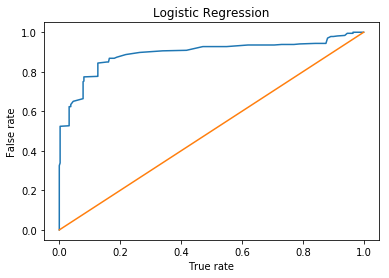

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_X,train_Y)
Ypred=clf.predict_proba(test_X)
Plot(test_Y,Ypred,"Logistic Regression")
Write_File("Logistic Regression",result,confusion_matrix(test_Y,Ypred,0.5))

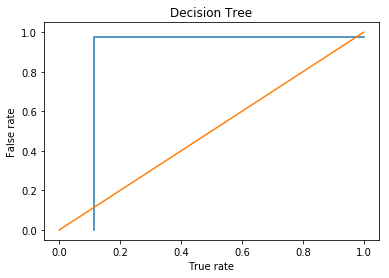

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_X,train_Y)
Ypred=clf.predict_proba(test_X)
Plot(test_Y,Ypred,"Decision Tree")
Write_File("Decision Tree",result,confusion_matrix(test_Y,Ypred,0.5))

C:\Users\gentl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


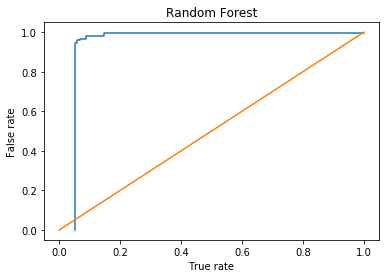

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X,train_Y)
Ypred=clf.predict_proba(test_X)
Plot(test_Y,Ypred,"Random Forest")
Write_File("Random Forest",result,confusion_matrix(test_Y,Ypred,0.5))

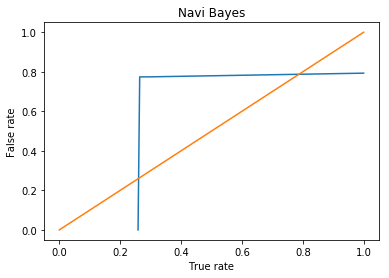

In [9]:
from sklearn.naive_bayes import MultinomialNB
for i in range(train_number):
    for k in range(4):
        if train_X[i][k]<0:
            train_X[i][k]=0
clf = MultinomialNB()
clf.fit(train_X,train_Y)
Ypred=clf.predict_proba(test_X)
Plot(test_Y,Ypred,"Navi Bayes")
Write_File("Navi Bayes",result,confusion_matrix(test_Y,Ypred,0.5))

In [10]:
result.close()